In [13]:
library(tidyverse)
options(jupyter.plot_mimetypes = "image/svg+xml")

In [2]:
dataFrame <- read.csv(file = "../csv/REQUEST-ACTIVITY.csv")
dataFrame %>%
  head()

,ContactType,ActivityUser,Outcome,ActivityType,CallerStatus,CustomerName,RequestType,RequesterFullName,CurrentAssigneeName,RequestMethod,Status
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Call,jdagher,N/A,N/A,Will Email or Fax,UC Health,N/A,Bill Wilhoit,Josephine Dagher,MassFax,Superceded
2,Call,jdagher,N/A,N/A,Will Email or Fax,UC Health,N/A,Bill Wilhoit,Josephine Dagher,MassFax,Superceded
3,Call,jdagher,Will Email or Fax,N/A,Will Email or Fax,UC Health,N/A,Bill Wilhoit,Josephine Dagher,MassFax,Superceded
4,Call,knorman,N/A,N/A,N/A,University Hospitals Health System,N/A,Marco Polo,Kermitha Norman,Macro,Fully Received
5,Call,croark,N/A,N/A,N/A,Advocate Aurora Health,Macro,Marco Polo,Carla Roark,Macro,Superceded
6,N/A,croark,N/A,N/A,N/A,Advocate Aurora Health,Macro,Marco Polo,Carla Roark,Macro,Superceded


In [3]:
dataFrame %>%
  mutate_all(~ na_if(., "N/A")) %>%
  mutate_all(as.factor) -> dataFrame

dataFrame %>%
  head()

,ContactType,ActivityUser,Outcome,ActivityType,CallerStatus,CustomerName,RequestType,RequesterFullName,CurrentAssigneeName,RequestMethod,Status
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,Call,jdagher,NA,NA,Will Email or Fax,UC Health,NA,Bill Wilhoit,Josephine Dagher,MassFax,Superceded
2,Call,jdagher,NA,NA,Will Email or Fax,UC Health,NA,Bill Wilhoit,Josephine Dagher,MassFax,Superceded
3,Call,jdagher,Will Email or Fax,NA,Will Email or Fax,UC Health,NA,Bill Wilhoit,Josephine Dagher,MassFax,Superceded
4,Call,knorman,NA,NA,NA,University Hospitals Health System,NA,Marco Polo,Kermitha Norman,Macro,Fully Received
5,Call,croark,NA,NA,NA,Advocate Aurora Health,Macro,Marco Polo,Carla Roark,Macro,Superceded
6,NA,croark,NA,NA,NA,Advocate Aurora Health,Macro,Marco Polo,Carla Roark,Macro,Superceded


In [4]:
dataFrame %>%
  select(CallerStatus, Status) %>%
  ftable() -> contingencyTable

contingencyTable

                          Status Account Identification Fully Received No Receipt Partial Receipt Superceded
CallerStatus                                                                                                
Failed Receipt Follow Up                              0             17        191               0        469
Left Voicemail                                      259            866      13792              96      11970
Need to Receive                                     110            174       2818              85      13709
Needs Account Number                                 20             21       1162              19        647
Needs Lead                                            2            757        107               0        302
Needs Research                                       38             70       6007              16        974
Needs Supervisor                                     37            160       2976               5       9172
Remove From Scope  

In [5]:
# perform Correspondence Analysis
contingencyTable %>%
  as.table() %>%
  FactoMineR::CA(graph = FALSE) -> correspondance

In [6]:
correspondance$row$coord %>%
  as.data.frame() %>%
    mutate(
      label = rownames(correspondance$row$coord),
      variable = "CallerStatus"
    ) -> correspondanceCallerStatus


correspondanceCallerStatus

,Dim 1,Dim 2,Dim 3,Dim 4,label,variable
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Failed Receipt Follow Up,-0.7476552,0.10811741,-0.008895180,-0.0051756726,Failed Receipt Follow Up,CallerStatus
Left Voicemail,-0.7649907,0.81468411,0.016972546,-0.0157979051,Left Voicemail,CallerStatus
Need to Receive,-0.7241051,-0.24066654,0.043878563,0.0143504680,Need to Receive,CallerStatus
Needs Account Number,-0.8186323,1.13685025,0.054696385,0.0147313013,Needs Account Number,CallerStatus
Needs Lead,0.5352511,0.07037531,-0.546627146,-0.0074775161,Needs Lead,CallerStatus
Needs Research,-0.9051203,1.79586064,0.007068835,-0.0281539117,Needs Research,CallerStatus
Needs Supervisor,-0.7542514,-0.02300000,0.013882777,-0.0074761834,Needs Supervisor,CallerStatus
Remove From Scope,-0.7993402,2.05237342,-0.000158225,0.0174250984,Remove From Scope,CallerStatus
Sent Authorization Letter,-0.6837060,-0.48001339,0.006090730,-0.0012581840,Sent Authorization Letter,CallerStatus


In [7]:
correspondance$col$coord %>%
  as.data.frame() %>%
  mutate(
    label = rownames(correspondance$col$coord),
    variable = "Status"
  ) -> correspondanceStatus

correspondanceStatus

,Dim 1,Dim 2,Dim 3,Dim 4,label,variable
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Account Identification,1.1546437,0.07538473,0.1132748274,-1.684132e-02,Account Identification,Status
Fully Received,1.0832761,0.05957929,-0.0311425353,-2.841664e-05,Fully Received,Status
No Receipt,-0.8485253,1.41104280,-0.0004845632,-2.791981e-04,No Receipt,Status
Partial Receipt,1.1219804,0.14349039,0.1105126010,4.418689e-02,Partial Receipt,Status
Superceded,-0.6287818,-0.47872040,0.0008607956,5.658071e-05,Superceded,Status


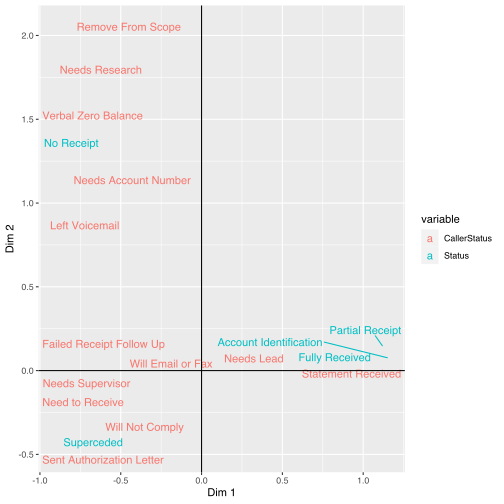

In [12]:
# CallerStatus = "Statement Received" highest predictor
# CallerStatus = "Remove From Scope" is third highest predictor
correspondanceCallerStatus %>%
  bind_rows(correspondanceStatus) %>%
  ggplot(aes(`Dim 1`, `Dim 2`, colour = variable)) +
    ggrepel::geom_text_repel(aes(label = label)) +
    geom_hline(yintercept = 0) +
    geom_vline(xintercept = 0)

In [17]:
correspondanceAnalysis <- function(dataFrame, rows, columns) {
  
  dataFrame %>%
    select(rows, columns) %>%
    ftable() %>%
    as.table() -> contingencyTable
  
  # perform Correspondence Analysis
  contingencyTable %>%
    FactoMineR::CA(graph = FALSE) -> correspondance
  
  
  correspondance$row$coord %>%
    as.data.frame() %>%
    mutate(
      label = rownames(correspondance$row$coord),
      variable = rows
    ) -> correspondanceRows
  
  
  correspondance$col$coord %>%
    as.data.frame() %>%
    mutate(
      label = rownames(correspondance$col$coord),
      variable = columns
    ) -> correspondanceColumns


  correspondanceRows %>%
    bind_rows(correspondanceColumns) %>%
    ggplot(aes(`Dim 1`, `Dim 2`, colour = variable)) +
      ggrepel::geom_text_repel(aes(label = label)) +
      geom_hline(yintercept = 0) +
      geom_vline(xintercept = 0)
}

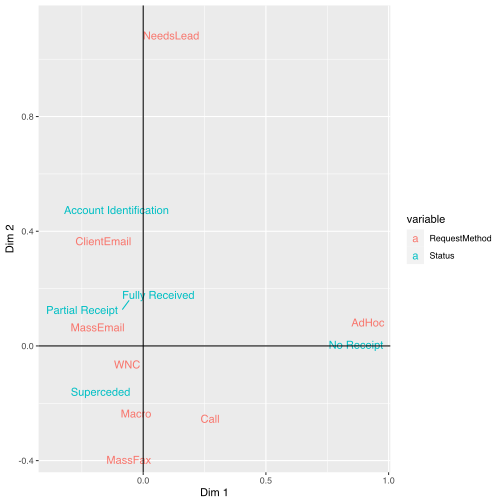

In [18]:
correspondanceAnalysis(dataFrame, "RequestMethod", "Status")

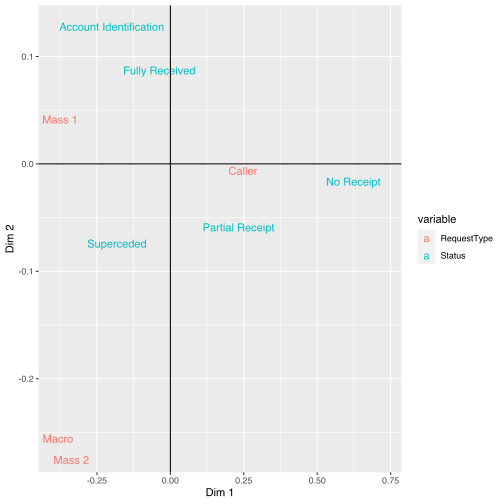

In [19]:
correspondanceAnalysis(dataFrame, "RequestType", "Status")

Warning message in FactoMineR::CA(., graph = FALSE):
“The rows afoley, akeefer, akoory1, Ashley Normand, ASIBLEY, Beth Herriman, CSAJAN, dkuester, dmcfadden, eflorance, Emma Curley, jfox, JFOX, jhernandez, jmalin, Kerry Kelemen, kophoff, ksavage, Louis Kiss, Molly Mankel, mpetroelje, NNAGELKERK, OBOSMA, Patrick VanderBerg, Ron Bianchi, Ryan TenBrink, smeyer, Test User, Tom Vryhof sum at 0. They were suppressed from the analysis”
Warning message:
“ggrepel: 115 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


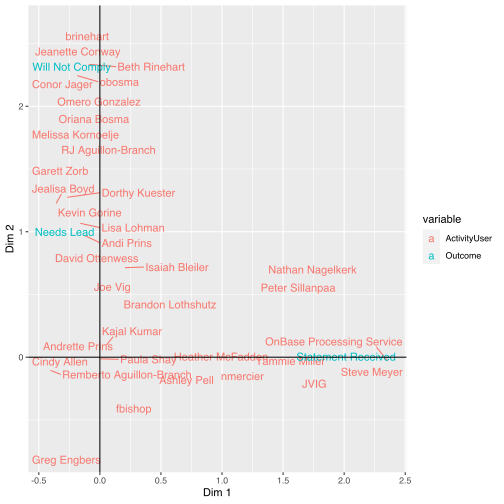

In [21]:
correspondanceAnalysis(dataFrame, "ActivityUser", "Outcome")

Warning message:
“ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


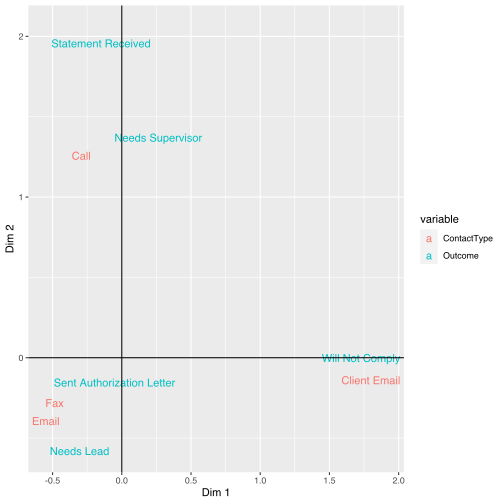

In [22]:
correspondanceAnalysis(dataFrame, "ContactType", "Outcome")

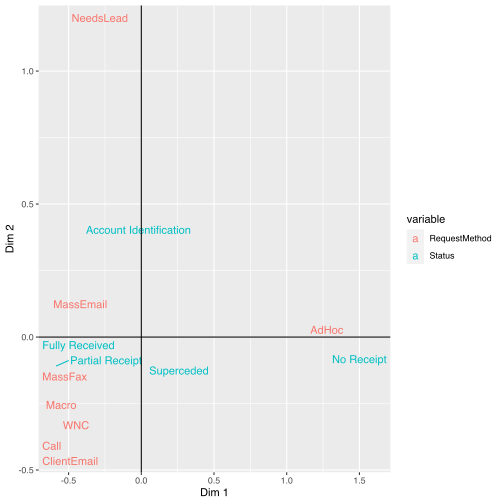

In [23]:
dataFrame %>%
  filter(ActivityUser == "OnBase Processing Service") %>%
  correspondanceAnalysis(., "RequestMethod", "Status")